# Categorical Data

* It is a qualitative data(labels or names)
* ⁠Categorical data represents information that can be sorted into distinct groups or categories, rather than measured numerically.   


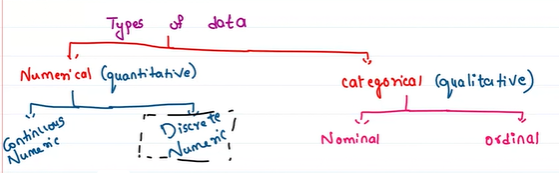

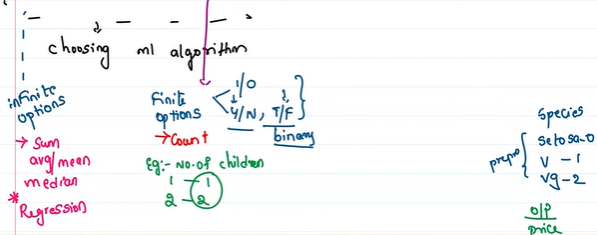

* Nominal -> No hierarchy (no order)
* order ->(hierarchy)

* Types of data -> The type of information of column is holding that is number data or categorical data

* Preprocessing -> categorical -> discrete num

# Encoding Techniques
- Label Encoder
- One Hot  Encoder
- Ordinal Encoder
- Freq/Count Encounter

# Label Encoder

* It assigns a unique integer to each category
* It is a Nominal data 
* there is no specific order required then we go with the alphabetical order for the labels

In [305]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder

In [134]:
color=['Red','Blue','Green','White','Red']
le=LabelEncoder()
encoded_data=le.fit_transform(color)

In [135]:
print(encoded_data)

[2 0 1 3 2]


In [136]:
gender=['Male','Female','Female','Male']
le=LabelEncoder()
encoded_data=le.fit_transform(gender)

In [137]:
print(encoded_data)

[1 0 0 1]


# One Hot Encoder

* Creates new columns for each category
* It uses 0 and 1

 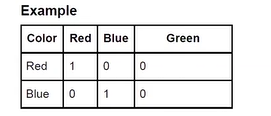



* whenever there is a matching label make it as 1 and there is no matching label make it as 0
* when we applying the one hot encoder dataset will be with  a curse of dimensionality 

### We Can Using Pandas 
### library using sklearn

### Advantages
* No false Ordering 
* Best for nominal data
### Disadvantages
* many categories -> many columns

In [138]:
df=pd.DataFrame(
    {'animal':['dog','cat','fox','dog']
})
print(df)
encoded_df=pd.get_dummies(df,columns=['animal'])
encoded_df

  animal
0    dog
1    cat
2    fox
3    dog


,animal_cat,animal_dog,animal_fox
0,False,True,False
1,True,False,False
2,False,False,True
3,False,True,False


In [139]:
df=pd.DataFrame(
    {'colors':['Red','Blue','Green','Orange','White','Purple','Red','Yellow','Blue','Green']
})
print(df)
encoded_df=pd.get_dummies(df,columns=['colors'])
encoded_df

   colors
0     Red
1    Blue
2   Green
3  Orange
4   White
5  Purple
6     Red
7  Yellow
8    Blue
9   Green


,colors_Blue,colors_Green,colors_Orange,colors_Purple,colors_Red,colors_White,colors_Yellow
0,False,False,False,False,True,False,False
1,True,False,False,False,False,False,False
2,False,True,False,False,False,False,False
3,False,False,True,False,False,False,False
4,False,False,False,False,False,True,False
5,False,False,False,True,False,False,False
6,False,False,False,False,True,False,False
7,False,False,False,False,False,False,True
8,True,False,False,False,False,False,False
9,False,True,False,False,False,False,False


In [140]:
from sklearn.preprocessing import OneHotEncoder
animals=[['dog'],['cat'],['fox']]
ani=OneHotEncoder()
enc=ani.fit_transform(animals)
print(enc)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 3 stored elements and shape (3, 3)>
  Coords	Values
  (0, 1)	1.0
  (1, 0)	1.0
  (2, 2)	1.0


In [141]:
from sklearn.preprocessing import OneHotEncoder
animals=[['cat'],['dog'],['fox']]
ohe=OneHotEncoder(sparse_output=False)
end=ohe.fit_transform(animals)
end

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

# Ordinal Encoding

* It is a specific Order
* we have to be properly give a instruction which order u want to encoding 

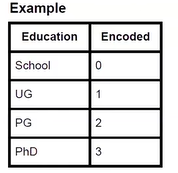

In [142]:
from sklearn.preprocessing import OrdinalEncoder

In [143]:
Education = [['SSC'],['Inter'], ['UG'], ['PG']]

oe = OrdinalEncoder(categories=[['SSC','Inter','UG','PG']])
encodes = oe.fit_transform(Education)
print(encodes)

[[0.]
 [1.]
 [2.]
 [3.]]


# Frequency / Count Encoding

* Its replaces category with frequency count
* we are using this with the help of map

## using Pandas

In [144]:
df=pd.DataFrame({
    'Animals':['fox','dog','cat','ox','fox','dog','fox']
})
df

,Animals
0,fox
1,dog
2,cat
3,ox
4,fox
5,dog
6,fox


In [145]:
df['Animals'].value_counts()

Animals
fox    3
dog    2
cat    1
ox     1
Name: count, dtype: int64

In [146]:
freq={'fox':3,'dog':2,'cat':1,'ox':0}

In [147]:
df['Manual Frequency ']=df['Animals'].map(freq)
df

,Animals,Manual Frequency
0,fox,3
1,dog,2
2,cat,1
3,ox,0
4,fox,3
5,dog,2
6,fox,3


In [148]:
df=pd.DataFrame({
    'Animals':['fox','dog','cat','ox','fox','dog','fox']
})
df

,Animals
0,fox
1,dog
2,cat
3,ox
4,fox
5,dog
6,fox


## Without manual frequency

In [149]:
freq=df['Animals'].value_counts()
freq

Animals
fox    3
dog    2
cat    1
ox     1
Name: count, dtype: int64

In [150]:
df['Without Manual Frequency']=df['Animals'].map(freq)
df

,Animals,Without Manual Frequency
0,fox,3
1,dog,2
2,cat,1
3,ox,1
4,fox,3
5,dog,2
6,fox,3


# Data Preprocessing For Categorical and Numerical Handling

In [306]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [307]:
df=pd.read_csv('loan_approved.csv')
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status (Approved)
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [308]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Loan_ID                 614 non-null    object 
 1   Gender                  601 non-null    object 
 2   Married                 611 non-null    object 
 3   Dependents              599 non-null    object 
 4   Education               614 non-null    object 
 5   Self_Employed           582 non-null    object 
 6   ApplicantIncome         614 non-null    int64  
 7   CoapplicantIncome       614 non-null    float64
 8   LoanAmount              592 non-null    float64
 9   Loan_Amount_Term        600 non-null    float64
 10  Credit_History          564 non-null    float64
 11  Property_Area           614 non-null    object 
 12  Loan_Status (Approved)  614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [198]:
df.shape

(614, 13)

In [199]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [200]:
df.isnull().sum()

Loan_ID                    0
Gender                    13
Married                    3
Dependents                15
Education                  0
Self_Employed             32
ApplicantIncome            0
CoapplicantIncome          0
LoanAmount                22
Loan_Amount_Term          14
Credit_History            50
Property_Area              0
Loan_Status (Approved)     0
dtype: int64

In [201]:
## precentage of the null values
df.isnull().sum()/len(df)*100

Loan_ID                   0.000000
Gender                    2.117264
Married                   0.488599
Dependents                2.442997
Education                 0.000000
Self_Employed             5.211726
ApplicantIncome           0.000000
CoapplicantIncome         0.000000
LoanAmount                3.583062
Loan_Amount_Term          2.280130
Credit_History            8.143322
Property_Area             0.000000
Loan_Status (Approved)    0.000000
dtype: float64

<Axes: xlabel='LoanAmount', ylabel='Density'>

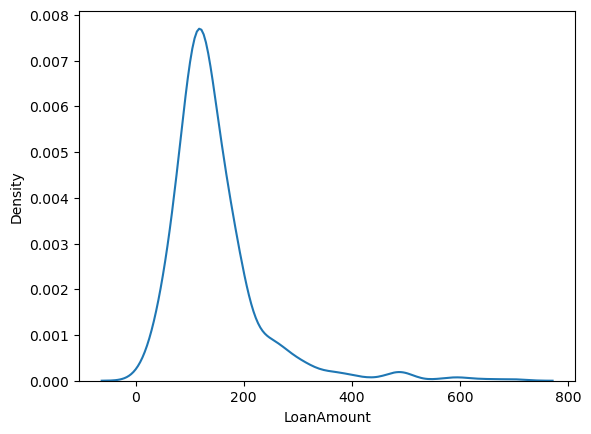

In [202]:
sns.kdeplot(data=df,x=df['LoanAmount'])

In [203]:
df['LoanAmount'].fillna(round(df['LoanAmount'].median(),1),inplace=True)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_18284\2031887114.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['LoanAmount'].fillna(round(df['LoanAmount'].median(),1),inplace=True)


In [204]:
df['LoanAmount'].isnull().sum()

np.int64(0)

<Axes: xlabel='Loan_Amount_Term', ylabel='Density'>

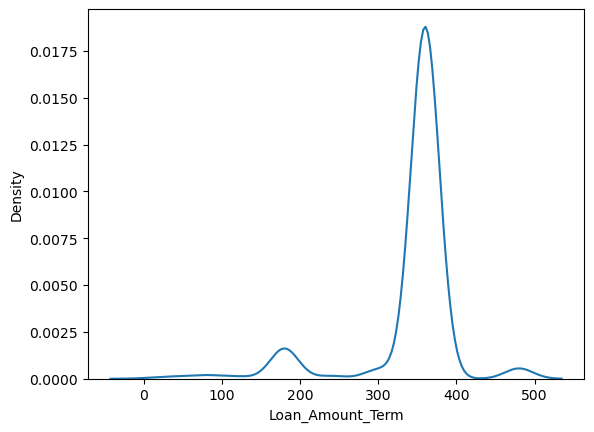

In [205]:
sns.kdeplot(data=df,x=df['Loan_Amount_Term'])

In [206]:
df['Loan_Amount_Term'].fillna(round(df['Loan_Amount_Term'].median(),1),inplace=True)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_18284\4133600163.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Loan_Amount_Term'].fillna(round(df['Loan_Amount_Term'].median(),1),inplace=True)


In [207]:
df['Loan_Amount_Term'].isnull().sum()

np.int64(0)

<Axes: xlabel='Credit_History', ylabel='Density'>

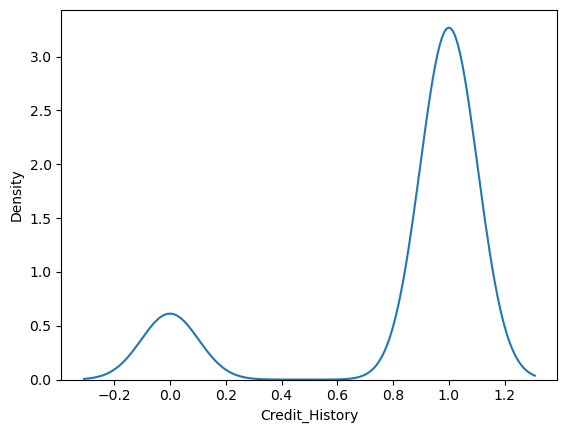

In [208]:
sns.kdeplot(data=df,x=df['Credit_History'])

In [209]:
df['Gender']

0        Male
1        Male
2        Male
3        Male
4        Male
        ...  
609    Female
610      Male
611      Male
612      Male
613    Female
Name: Gender, Length: 614, dtype: object

In [210]:
df['Credit_History'].fillna(round(df['Credit_History'].median(),1),inplace=True)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_18284\1112648606.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Credit_History'].fillna(round(df['Credit_History'].median(),1),inplace=True)


# Categorical Handling

In [211]:
cat_cols=df.select_dtypes(include=['object'])

In [212]:
cat_cols

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status (Approved)
0,LP001002,Male,No,0,Graduate,No,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,Urban,Y
4,LP001008,Male,No,0,Graduate,No,Urban,Y
...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,Urban,Y


In [213]:
for cat in cat_cols:
    df[cat].fillna(df[cat].mode()[0],inplace=True)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_18284\2289611485.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[cat].fillna(df[cat].mode()[0],inplace=True)


In [214]:
df.isnull().sum()

Loan_ID                   0
Gender                    0
Married                   0
Dependents                0
Education                 0
Self_Employed             0
ApplicantIncome           0
CoapplicantIncome         0
LoanAmount                0
Loan_Amount_Term          0
Credit_History            0
Property_Area             0
Loan_Status (Approved)    0
dtype: int64

In [215]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status (Approved)
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [216]:
df=df.drop(columns=['Loan_ID','Dependents'])

In [217]:
df

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status (Approved)
0,Male,No,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,Male,Yes,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [218]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Gender                  614 non-null    object 
 1   Married                 614 non-null    object 
 2   Education               614 non-null    object 
 3   Self_Employed           614 non-null    object 
 4   ApplicantIncome         614 non-null    int64  
 5   CoapplicantIncome       614 non-null    float64
 6   LoanAmount              614 non-null    float64
 7   Loan_Amount_Term        614 non-null    float64
 8   Credit_History          614 non-null    float64
 9   Property_Area           614 non-null    object 
 10  Loan_Status (Approved)  614 non-null    object 
dtypes: float64(4), int64(1), object(6)
memory usage: 52.9+ KB


In [219]:
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [220]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Gender']=le.fit_transform(df['Gender'])

In [221]:
df

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status (Approved)
0,1,No,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,1,Yes,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,1,Yes,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,1,Yes,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,1,No,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...
609,0,No,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,1,Yes,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,1,Yes,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,1,Yes,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


<Axes: xlabel='ApplicantIncome'>

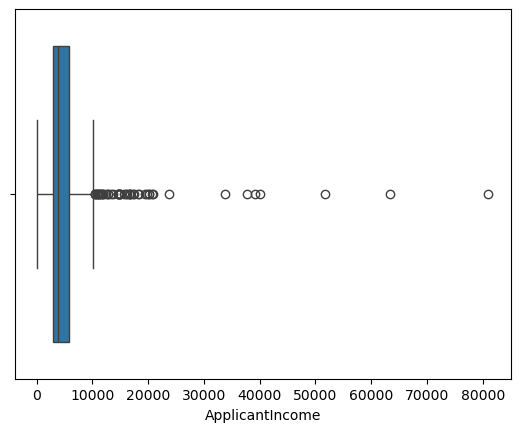

In [222]:
sns.boxplot(data=df,x=df['ApplicantIncome'])

In [223]:
df['Married'].unique()

array(['No', 'Yes'], dtype=object)

In [224]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Married']=le.fit_transform(df['Married'])

In [225]:
df['Married'].unique()

array([0, 1])

In [226]:
df

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status (Approved)
0,1,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,1,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,1,1,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,1,1,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,1,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,1,1,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,1,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,1,1,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [227]:
df['Education'].unique()

array(['Graduate', 'Not Graduate'], dtype=object)

In [228]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Education']=le.fit_transform(df['Education'])
df

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status (Approved)
0,1,0,0,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,1,1,0,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,1,1,0,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,1,1,1,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,1,0,0,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,1,1,0,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,1,1,0,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,1,1,0,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [229]:
df['Self_Employed'].unique()

array(['No', 'Yes'], dtype=object)

In [230]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Self_Employed']=le.fit_transform(df['Self_Employed'])

In [231]:
df

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status (Approved)
0,1,0,0,0,5849,0.0,128.0,360.0,1.0,Urban,Y
1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,Rural,N
2,1,1,0,1,3000,0.0,66.0,360.0,1.0,Urban,Y
3,1,1,1,0,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,1,0,0,0,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,2900,0.0,71.0,360.0,1.0,Rural,Y
610,1,1,0,0,4106,0.0,40.0,180.0,1.0,Rural,Y
611,1,1,0,0,8072,240.0,253.0,360.0,1.0,Urban,Y
612,1,1,0,0,7583,0.0,187.0,360.0,1.0,Urban,Y


In [232]:
df['Loan_Status (Approved)'].unique()

array(['Y', 'N'], dtype=object)

In [366]:
df['Loan_Status (Approved)'].unique()
df

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status (Approved)
0,Male,No,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [234]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Gender                  614 non-null    int64  
 1   Married                 614 non-null    int64  
 2   Education               614 non-null    int64  
 3   Self_Employed           614 non-null    int64  
 4   ApplicantIncome         614 non-null    int64  
 5   CoapplicantIncome       614 non-null    float64
 6   LoanAmount              614 non-null    float64
 7   Loan_Amount_Term        614 non-null    float64
 8   Credit_History          614 non-null    float64
 9   Property_Area           614 non-null    object 
 10  Loan_Status (Approved)  614 non-null    object 
dtypes: float64(4), int64(5), object(2)
memory usage: 52.9+ KB


In [235]:
df['Property_Area'].unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

# OneHotEncoder

In [376]:
from sklearn.preprocessing import OneHotEncoder
ohe=OneHotEncoder(sparse_output=False)
encoded=ohe.fit_transform(df[['Property_Area']])
encoded

array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       ...,
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.]])

In [377]:
con=pd.DataFrame(encoded)
con

,0,1,2
0,0.0,0.0,1.0
1,1.0,0.0,0.0
2,0.0,0.0,1.0
3,0.0,0.0,1.0
4,0.0,0.0,1.0
...,...,...,...
609,1.0,0.0,0.0
610,1.0,0.0,0.0
611,0.0,0.0,1.0
612,0.0,0.0,1.0


In [378]:
df['Property_Area'].value_counts()

Property_Area
Semiurban    233
Urban        202
Rural        179
Name: count, dtype: int64

In [379]:
freq={'Semiurban':0,'Urban':1,'Rural':2}
df['property_area']=df['Property_Area'].map(freq)
df

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status (Approved),property_area
0,Male,No,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,1
1,Male,Yes,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,2
2,Male,Yes,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,1
3,Male,Yes,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,1
4,Male,No,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y,2
610,Male,Yes,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y,2
611,Male,Yes,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y,1
612,Male,Yes,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y,1


In [380]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder

In [381]:
df=pd.read_csv('loan_approved.csv')

In [382]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status (Approved)
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [383]:
df.isnull().sum()

Loan_ID                    0
Gender                    13
Married                    3
Dependents                15
Education                  0
Self_Employed             32
ApplicantIncome            0
CoapplicantIncome          0
LoanAmount                22
Loan_Amount_Term          14
Credit_History            50
Property_Area              0
Loan_Status (Approved)     0
dtype: int64

In [384]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Loan_ID                 614 non-null    object 
 1   Gender                  601 non-null    object 
 2   Married                 611 non-null    object 
 3   Dependents              599 non-null    object 
 4   Education               614 non-null    object 
 5   Self_Employed           582 non-null    object 
 6   ApplicantIncome         614 non-null    int64  
 7   CoapplicantIncome       614 non-null    float64
 8   LoanAmount              592 non-null    float64
 9   Loan_Amount_Term        600 non-null    float64
 10  Credit_History          564 non-null    float64
 11  Property_Area           614 non-null    object 
 12  Loan_Status (Approved)  614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [385]:
df.drop(['Loan_ID', 'Dependents'],axis=1, inplace=True)

In [386]:
df.shape

(614, 11)

In [387]:
num_cols = df.select_dtypes(include='number').columns
print(num_cols)

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')


In [388]:
for i in df.columns:
  if df[i].dtypes == "number":
      if df[i].mean()==df[i].median():
          df[i].fillna(df[i].mean())

In [389]:
cat_cols=df.select_dtypes(include='object').columns
print(cat_cols)

Index(['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area',
       'Loan_Status (Approved)'],
      dtype='object')


In [390]:
for i in df.columns:
  if df[i].dtypes == "object":
    df[i] = df[i].fillna(df[i].mode()[0])